In [1]:
from pyiron_workflow import Workflow

In [ ]:
wget https://gitlab.com/jesseds/apav/-/raw/JOSS/apav/tests/Si.RRNG
wget https://gitlab.com/jesseds/apav/-/raw/JOSS/apav/tests/Si.RNG
wget https://gitlab.com/jesseds/apav/-/raw/JOSS/apav/tests/Si.apt
wget https://gitlab.com/jesseds/apav/-/raw/JOSS/apav/tests/Si.pos

In [2]:
@Workflow.wrap.as_function_node('transcoder_config')
def transcoder_config(apt_file='Si.apt', rng_file='Si.RNG', jobid=1):
    from paraprobe_parmsetup.transcoder_config import ParmsetupTranscoder, TranscodingTask
    transcoder = ParmsetupTranscoder()
    transcoder_config = transcoder.load_reconstruction_and_ranging(
        recon_fpath=apt_file,
        range_fpath=rng_file,
        jobid=jobid)
    return transcoder_config

In [3]:
@Workflow.wrap.as_function_node('transcoder_results')
def transcoder_results(transcoder_config):
    from paraprobe_transcoder import ParaprobeTranscoder
    transcoder = ParaprobeTranscoder(transcoder_config)
    results = transcoder.execute()
    return results

In [4]:
wf = Workflow("demo")
wf.transcoder_config = transcoder_config()
wf.transcoder_results = transcoder_results(wf.transcoder_config)

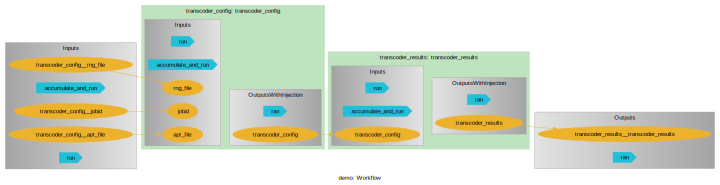

In [7]:
wf.draw(size=(10,20))

In [9]:
wf.outputs

In [8]:
wf.run()

Computing SHA256 hash for file named Si.apt
Computing SHA256 hash for file named Si.RNG
Inspecting whether NeXus/HDF5 is used...
The reconstruction and ranging come from files of technology
partners but the paraprobe-toolbox uses NeXus/HDF5.
Hence, paraprobe-transcoder will transcode to NeXus/HDF5.
Writing configuration file ...
PARAPROBE.Transcoder.Config.SimID.1.nxs was written successfully
/entry1/transcode/reconstruction/path, /entry1/transcode/ranging/path
True
Processing configuration file: PARAPROBE.Transcoder.Config.SimID.1.nxs
Processing reconstruction: Si.apt
Processing ranging: Si.RNG
Results file: PARAPROBE.Transcoder.Results.SimID.1.nxs
Input reconstruction and ranging definitions use files from
technology partners (POS, ePOS, APT, RRNG, RNG) or other
file formats from the community. These will be transcoded to NeXus...
Computing SHA256 hash for file named PARAPROBE.Transcoder.Config.SimID.1.nxs
Reading Si.apt which is 37810040 B
File describes 945211 ions
Currently at byt

{'transcoder_results__transcoder_results': 'PARAPROBE.Transcoder.Results.SimID.1.nxs'}